In [7]:
import pandas as pd
import numpy as np

heart = pd.read_csv("C:\\Users\\Administrator\\Desktop\\heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
# 레이블 인코딩

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
heart['HeartDisease']= label_encoder.fit_transform(heart['HeartDisease'])
heart['Smoking']= label_encoder.fit_transform(heart['Smoking'])
heart['AlcoholDrinking']= label_encoder.fit_transform(heart['AlcoholDrinking'])
heart['Stroke']= label_encoder.fit_transform(heart['Stroke'])
heart['DiffWalking']= label_encoder.fit_transform(heart['DiffWalking'])
heart['Sex']= label_encoder.fit_transform(heart['Sex'])
heart['AgeCategory']= label_encoder.fit_transform(heart['AgeCategory'])
heart['Race']= label_encoder.fit_transform(heart['Race'])
heart['Diabetic']= label_encoder.fit_transform(heart['Diabetic'])
heart['PhysicalActivity']= label_encoder.fit_transform(heart['PhysicalActivity'])
heart['GenHealth']= label_encoder.fit_transform(heart['GenHealth'])
heart['Asthma']= label_encoder.fit_transform(heart['Asthma'])
heart['KidneyDisease']= label_encoder.fit_transform(heart['KidneyDisease'])
heart['SkinCancer']= label_encoder.fit_transform(heart['SkinCancer'])

In [9]:
# X,y Split

# X, y = heart.loc[:, heart.columns != 'HeartDisease'], heart['HeartDisease']

#X, y = heart[['DiffWalking','AgeCategory']], heart['HeartDisease']

X, y = heart[['Stroke','DiffWalking','AgeCategory','PhysicalHealth','KidneyDisease','Smoking']], heart['HeartDisease']

In [10]:
#  Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
# 특성값Feature 스케일링

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred)

0.9108306545422707


In [8]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
knn_eval = evaluate_model(knn, X_test, y_test)

print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9117312286582696
Precision: 0.4326923076923077
Recall: 0.05183585313174946
F1 Score: 0.09258068664009259
Cohens Kappa Score: 0.07539541183124598
Area Under Curve: 0.674978034084269
Confusion Matrix:
 [[72532   472]
 [ 6585   360]]


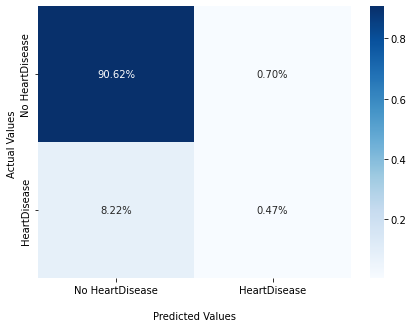

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()


# NN

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(17, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(17, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='relu')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=10,
    
)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3279 - binary_accuracy: 0.8753 - val_loss: 0.2388 - val_binary_accuracy: 0.9137
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2397 - binary_accuracy: 0.9129 - val_loss: 0.2320 - val_binary_accuracy: 0.9142
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2334 - binary_accuracy: 0.9151 - val_loss: 0.2312 - val_binary_accuracy: 0.9143
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2309 - binary_accuracy: 0.9151 - val_loss: 0.2314 - val_binary_accuracy: 0.9145
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2297 - binary_accuracy: 0.9159 - val_loss: 0.2318 - val_binary_accuracy: 0.9145
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2286 - binary_accuracy: 0.9157 - val_loss: 0.2308 - val_binary_accuracy: 0.9145
Epoch 7/20
469/469 [==============================] - 2s 3ms/ste

In [35]:
model.output[1]

<KerasTensor: shape=(1,) dtype=float32 (created by layer 'tf.__operators__.getitem_2')>

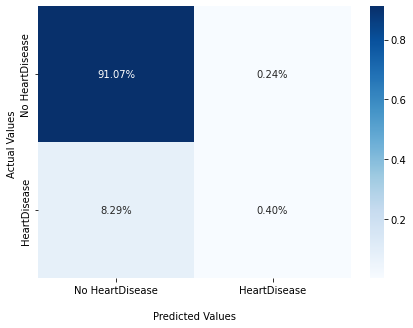

In [36]:
y_pred3=model.predict(X_test)

pred3_1d = y_pred3.flatten() # 차원 펴주기
pred_class = np.where(pred3_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1

cm3= confusion_matrix(y_test, pred_class)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm3/np.sum(cm3),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

# SVM

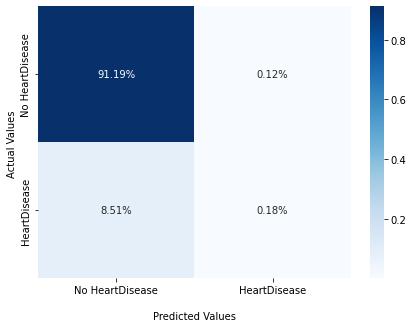

In [6]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svmpoly_clf = SVC(kernel="poly", gamma='auto') # Play with degree and C
svmpoly_clf.fit(X_train, y_train)

y_pred_svm=svmpoly_clf.predict(X_test)
cm5=confusion_matrix(y_test,y_pred_svm)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm5/np.sum(cm5),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()